In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
from pandas import Series

# Add the project directory to sys.path
project_dir = Path.cwd().parent  # Adjust as needed to point to your project root
sys.path.append(str(project_dir))

# Import the module
from utils.pipeline import Pipeline
from utils.dslabs_functions import NR_STDEV, get_variable_types, determine_outlier_thresholds_for_var
from utils.pipeline import Pipeline, EvaluationEnum

dataloader = Pipeline(evaluation=EvaluationEnum.MISSING_VALUES)



e_data, e_target = dataloader.get_econmical_classification_dataset_and_target()

print(NR_STDEV)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2


Evaluation of the models for the Economic no_outlier_handling dataset
evaluation for ['NB', 'KNN']
{'accuracy': [0.45034013605442175, 0.9455782312925171], 'recall': [0.926829268292683, 0.17073170731707318], 'precision': [0.08656036446469248, 0.5384615384615384], 'auc': [0.6745097350108948, 0.5810430870879313], 'f1': [0.15833333333333333, 0.25925925925925924]}


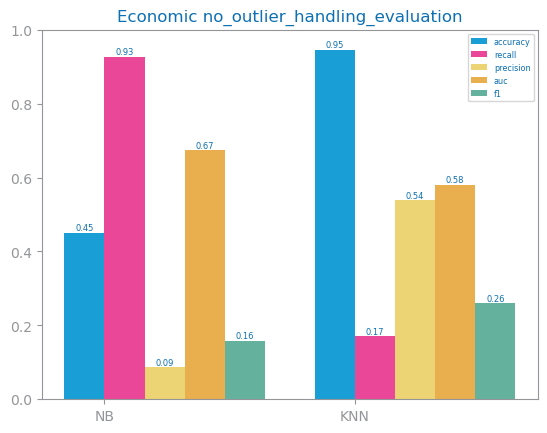

In [10]:
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utils.dslabs_functions import plot_multibar_chart, evaluate_approach

data = e_data
train, test = train_test_split(data, test_size=0.2, random_state=42)
# scale train and test data
scaler = MinMaxScaler()
train = DataFrame(scaler.fit_transform(train), columns=train.columns)
test = DataFrame(scaler.transform(test), columns=test.columns)



figure()
file_tag = "Economic no_outlier_handling"
eval: dict[str, list] = evaluate_approach(train, test, target=e_target, metric="recall")
print(f"Evaluation of the models for the {file_tag} dataset")
print("evaluation for " + str(["NB", "KNN"]))
print(eval)
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag}_evaluation", percentage=True
)
path = f"images/{file_tag}_eval.png"
if not Path(path).exists():
    savefig(path)
show()

## lets look at economic data

### Remove outliers

In [ ]:


data = e_data #.copy(deep=True)
print(f"Data before dropping outliers: {data.shape}")
file_tag = "economic_" + e_target
n_std: int = NR_STDEV
numeric_vars: list[str] = get_variable_types(data)["numeric"]
if numeric_vars is not None:
    df: DataFrame = data.copy(deep=True)
    summary5: DataFrame = data[numeric_vars].describe()
    for var in numeric_vars:
        top_threshold, bottom_threshold = determine_outlier_thresholds_for_var(
            summary5[var]
        )
        # print(f"Variable: {var}")
        # print(f"Top threshold: {top_threshold}")
        # print(f"Bottom threshold: {bottom_threshold}")
        outliers: Series = df[(df[var] > top_threshold) | (df[var] < bottom_threshold)]
        df.drop(outliers.index, axis=0, inplace=True)
    print(f"Data after dropping outliers: {df.shape}")
else:
    print("There are no numeric variables")

Data before dropping outliers: (3672, 87)
Data after dropping outliers: (632, 87)


Data after dropping outliers: (632, 87)
Evaluation of the models for the economic_CLASS dataset
evaluation for ['NB', 'KNN']
{'accuracy': [0.984251968503937, 0.9921259842519685], 'recall': [1.0, 1.0], 'precision': [0.3333333333333333, 0.5], 'auc': [0.9920634920634921, 0.996031746031746], 'f1': [0.5, 0.6666666666666666]}


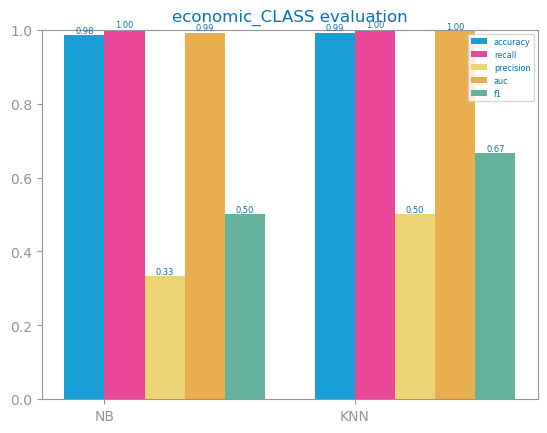

In [12]:
from matplotlib.pyplot import savefig, show, figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utils.dslabs_functions import plot_multibar_chart, evaluate_approach

train, test = train_test_split(df, test_size=0.2, random_state=42)
# scale train and test data
scaler = MinMaxScaler()
train = DataFrame(scaler.fit_transform(train), columns=train.columns)
test = DataFrame(scaler.transform(test), columns=test.columns)


print(f"Data after dropping outliers: {df.shape}")
figure()
eval: dict[str, list] = evaluate_approach(train, test, target=e_target, metric="recall")
print(f"Evaluation of the models for the {file_tag} dataset")
print("evaluation for " + str(["NB", "KNN"]))
print(eval)
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
file_tag = "economic_remove_outliers"
path = f"images/{file_tag}_eval.png"
if not Path(path).exists():
    savefig(path)
show()

### Replace outliers with fixed value


In [13]:
if [] != numeric_vars:
    df: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var])
        median: float = df[var].median()
        df[var] = df[var].apply(lambda x: median if x > top or x < bottom else x)
    # df.to_csv(f"data/{file_tag}_replacing_outliers.csv", index=True)
    print("Data after replacing outliers:", df.shape)
    
else:
    print("There are no numeric variables")
if [] == numeric_vars:
    exit()
df.describe()

Data after replacing outliers: (3672, 87)


,Company,Time,Financial Distress,CLASS,x1,x2,x3,x4,x5,x6,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,...,3672.00000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,180.299292,7.528322,0.882825,0.037037,1.286091,0.115923,0.632942,7.944232e-01,0.140659,0.101557,...,85.07438,81.527603,89.115908,17.481291,14.647239,-1.384937,20.177288,0.933572,11.438998,32.857843
std,115.289514,4.064016,1.201236,0.188878,0.579206,0.093338,0.156030,3.736412e-01,0.097043,0.174912,...,14.50188,54.173449,64.349382,1.744186,2.100530,6.839903,6.754068,1.116848,6.972967,13.217640
min,1.000000,1.000000,-4.063300,0.000000,0.075170,-0.110120,0.260390,5.350000e-07,-0.092911,-0.313060,...,54.80600,24.318000,23.776000,15.250000,12.000000,-18.800000,5.000000,-0.499220,1.000000,6.000000
25%,80.000000,4.000000,0.174423,0.000000,0.952145,0.049665,0.526887,5.525575e-01,0.071860,-0.015400,...,79.95100,39.800000,38.377000,16.000000,13.000000,-6.400000,15.000000,0.189912,6.000000,22.000000
50%,168.000000,7.000000,0.583805,0.000000,1.183550,0.107530,0.638690,7.752325e-01,0.131830,0.104325,...,90.00000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594662,11.000000,34.000000
75%,262.000000,11.000000,1.278950,0.000000,1.479075,0.170327,0.749425,9.927725e-01,0.200270,0.216540,...,92.90000,100.000000,132.400000,18.000000,16.000000,2.100000,26.000000,1.282325,15.000000,44.000000
max,416.000000,14.000000,6.312400,1.000000,4.289400,0.369200,0.967900,2.011100e+00,0.402120,0.524970,...,119.02000,219.400000,214.500000,21.750000,20.750000,8.600000,34.000000,6.312400,32.000000,60.000000


Evaluation of the models for the fix outliers_econmical_classification dataset
evaluation for ['NB', 'KNN']
{'accuracy': [0.4993197278911565, 0.9428571428571428], 'recall': [0.9024390243902439, 0.17073170731707318], 'precision': [0.09226932668329177, 0.4666666666666667], 'auc': [0.6889716735784073, 0.5796021648977296], 'f1': [0.167420814479638, 0.25]}


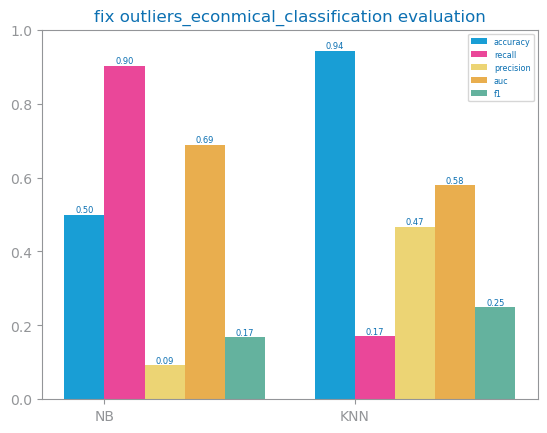

In [14]:
from matplotlib.pyplot import savefig, show, figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utils.dslabs_functions import plot_multibar_chart, evaluate_approach

train, test = train_test_split(df, test_size=0.2, random_state=42)
# scale train and test data
scaler = MinMaxScaler()
train = DataFrame(scaler.fit_transform(train), columns=train.columns)
test = DataFrame(scaler.transform(test), columns=test.columns)


file_tag = "fix outliers_econmical_classification"
figure()
eval: dict[str, list] = evaluate_approach(train, test, target=e_target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
print(f"Evaluation of the models for the {file_tag} dataset")
print("evaluation for " + str(["NB", "KNN"]))
print(eval)
path = f"images/{file_tag}_eval.png"
if not Path(path).exists():
    savefig(path)
show()

### Turnicate outliers

In [15]:

if [] != numeric_vars:
    df: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var])
        df[var] = df[var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    # df.to_csv(f"data/{file_tag}_truncate_outliers.csv", index=True)
    print("Data after truncating outliers:", df.shape)
else:
    print("There are no numeric variables")

if [] == numeric_vars:
    exit()
df.describe()

Data after truncating outliers: (3672, 87)


,Company,Time,Financial Distress,CLASS,x1,x2,x3,x4,x5,x6,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.056230,7.528322,0.968539,0.037037,1.330980,0.126114,0.618399,8.371999e-01,0.151653,0.105465,...,86.804492,91.539014,89.115908,17.772537,15.124978,-2.595903,19.753274,1.022623,12.780680,33.015864
std,116.967639,4.064016,1.390794,0.188878,0.681107,0.108335,0.171685,4.348075e-01,0.114010,0.199371,...,16.634687,63.868986,64.349382,2.023139,2.660929,8.049520,7.381653,1.303528,8.596450,13.623111
min,1.000000,1.000000,-4.264198,0.000000,0.075170,-0.110320,0.259961,5.350000e-07,-0.094859,-0.314392,...,54.806000,24.318000,23.776000,15.250000,12.000000,-19.049631,4.697422,-0.499220,1.000000,5.615809
25%,80.000000,4.000000,0.172275,0.000000,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,0.000000,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,0.000000,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,416.133694,14.000000,6.344711,1.000000,4.293672,0.369732,0.967900,2.012064e+00,0.404757,0.527826,...,120.252240,221.233513,214.500000,21.861159,20.856004,8.600000,34.731772,6.433954,32.054092,60.474060


Evaluation of the models for the economic_truncate_outliers dataset
evaluation for ['NB', 'KNN']
{'accuracy': [0.6748299319727891, 0.9428571428571428], 'recall': [0.9024390243902439, 0.12195121951219512], 'precision': [0.13602941176470587, 0.45454545454545453], 'auc': [0.7819111548464186, 0.5566528431854925], 'f1': [0.2364217252396166, 0.19230769230769232]}


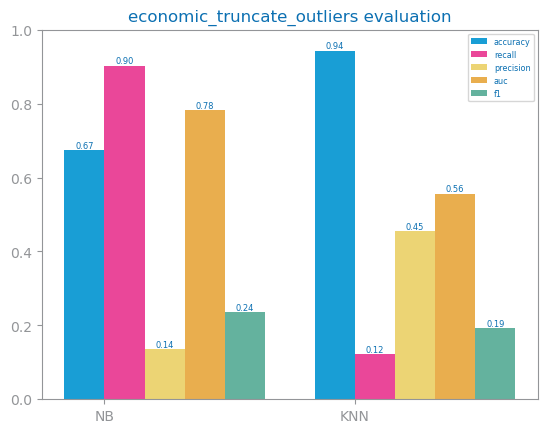

In [16]:
from matplotlib.pyplot import savefig, show, figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utils.dslabs_functions import plot_multibar_chart, evaluate_approach

train, test = train_test_split(df, test_size=0.2, random_state=42)
# scale train and test data
scaler = MinMaxScaler()
train = DataFrame(scaler.fit_transform(train), columns=train.columns)
test = DataFrame(scaler.transform(test), columns=test.columns)


file_tag = "economic_truncate_outliers"
figure()
eval: dict[str, list] = evaluate_approach(train, test, target=e_target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
print(f"Evaluation of the models for the {file_tag} dataset")
print("evaluation for " + str(["NB", "KNN"]))
print(eval)
path = f"images/{file_tag}_eval.png"
if not Path(path).exists():
    savefig(path)
show()

### concolusion for the economic data set
**Outlier Comparing:** no-handling, dropping, fixed-value replacement, and truncation: 

Dropping outliers yielded the highest accuracy (0.99) but cut the dataset size drastically (3672→632). Truncation and no handling maintained data integrity but lowered accuracy. Balancing performance and data representativeness, doing nothing is chosen.